In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv("Customer_churn_prediction.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2809,4360-QRAVE,Male,1,No,No,37,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,36.65,1315,No
1315,5158-RIVOP,Female,0,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.90,202.3,No
1889,8069-YQQAJ,Male,0,No,No,14,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,31.10,419.7,No
317,2321-OMBXY,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Credit card (automatic),80.30,3058.65,Yes
5222,6854-EXGSF,Female,0,No,No,8,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),65.50,573.15,No


In [9]:
#Drop column
#the inplace will drop the columns and update the table
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
216,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),45.25,3139.8,No
3886,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.85,7677.4,No
4376,Female,0,No,No,45,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,100.30,4483.95,No
5082,Male,0,Yes,Yes,21,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,350.1,No
484,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes


In [13]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [16]:
# Converting total charges from object to flaot
#pd.to_numeric will convert object into float and remove if there any space
pd.to_numeric(df.TotalCharges, errors='coerce')
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [19]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [21]:
df.shape

(7043, 20)

In [23]:
# for finding specific record/indexing
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [24]:
df.iloc[488]['TotalCharges']

' '

In [26]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [28]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [32]:
#Converted object of TotalCharges into float64
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [33]:
df1.TotalCharges.dtype

dtype('float64')

In [34]:
#Customers data with all the value 'NO'
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


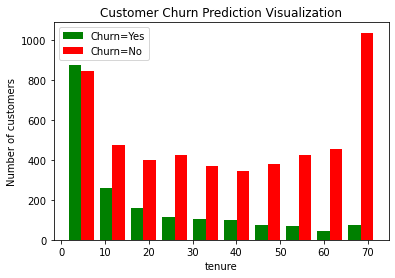

In [41]:
#for getting specific value with 'No' tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.legend()

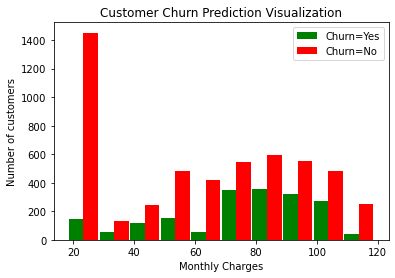

In [43]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [48]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column} : {df[column].unique()}')

In [49]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [52]:
# Data Cleaning 

# for modifying in the data

df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace = True)



In [53]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [55]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines',
                  'OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies',
                 'PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

In [56]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [57]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [58]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [61]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [62]:
 df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2718,0,0,0,0,62,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1416,1,0,1,1,58,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
5898,1,0,1,1,33,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6346,0,1,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [63]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [65]:
# Scaling the other columns outside the range of 0 and 1, we have scale all the data between 0 and 1
# For scaling we use min and max scaler

cols_to_scale =['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# After MinMaxScaler then apply fit and transform

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [66]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2905,1,0,1,0,0.281690,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
497,1,0,1,0,0.971831,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3262,1,0,1,1,0.464789,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
254,0,0,0,0,0.126761,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [67]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [74]:
# Train, Test and split Model

X = df2.drop('Churn', axis='columns')
y = df2['Churn']


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [77]:
X_train.shape

(5625, 26)

In [78]:
X_test.shape

(1407, 26)

In [79]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [80]:
len(X_train.columns)

26

In [102]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(15,  activation = 'relu'),
    keras.layers.Dense(1,  activation = 'sigmoid')
])
# binary_crossentropy is used for the output is in the form of 0 and 1
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7545
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8032
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4052 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8299
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8331
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8329
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8364
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8327
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8311
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8329
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8341
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 

In [107]:
model.evaluate(X_test, y_test)

ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [108]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.452375  ],
       [0.5453598 ],
       [0.0343292 ],
       [0.752386  ],
       [0.46164745]], dtype=float32)

In [109]:
y_test[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [110]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [111]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [113]:
# Printing classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1085
           1       0.77      0.84      0.80       322

    accuracy                           0.91      1407
   macro avg       0.86      0.88      0.87      1407
weighted avg       0.91      0.91      0.91      1407



Text(69.0, 0.5, 'Truth')

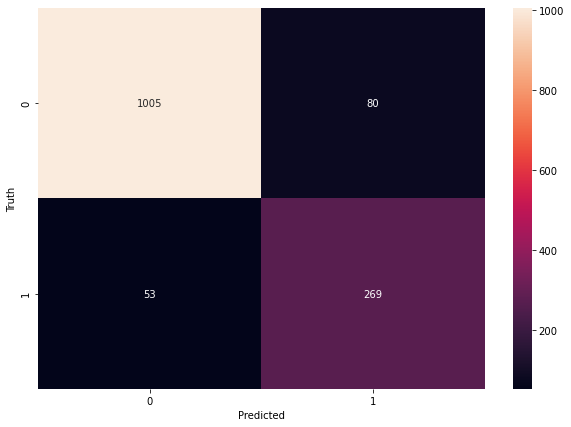

In [114]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
(1005+269)/(1005+269+80+56)

0.9035460992907801